In [ ]:
import os

def L1_filter_dist(fileName):
    if len(fileName) <= 21 and fileName != '.ipynb_checkpoints' and 'cp' in fileName:
        return True
    else:
        return False

def L2_filter_dist(fileName):
    if len(fileName) > 21 and fileName != '.ipynb_checkpoints' and 'cp' in fileName:
        return True
    else:
        return False

def non_CP_filter_dist(fileName):
    if not L2_filter_dist(fileName) and not L1_filter_dist(fileName) and fileName != '.ipynb_checkpoints':
        return True
    else:
        return False

def reorder_nonCP(fileList):
    return [fileList[6], fileList[7], fileList[2], fileList[3], fileList[0], fileList[1], fileList[4], fileList[5], fileList[-2], fileList[-1], fileList[8], fileList[9], fileList[-4], fileList[-3], fileList[-6], fileList[-5]]



paramDir = '/home/abenneck/dragonfly_work/gaussian_parameters'
nonCP_files = sorted(filter(non_CP_filter_dist,os.listdir(paramDir)))

nonCP_files

In [ ]:
def reorder_nonCP(fileList):
    return [fileList[14], fileList[15], fileList[2], fileList[3], fileList[0], fileList[1], fileList[12], fileList[13], fileList[28], fileList[29], 
            fileList[], fileList[], fileList[], fileList[], fileList[], fileList[], fileList[], fileList[], fileList[], fileList[], 
            fileList[], fileList[], fileList[], fileList[], fileList[], fileList[], fileList[], fileList[], fileList[], fileList[]]

reorder_nonCP(nonCP_files)

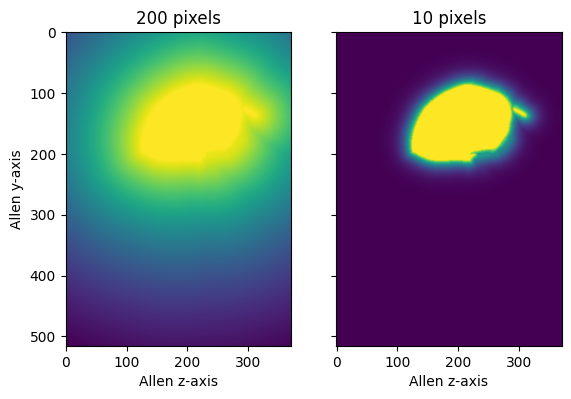

In [55]:
import numpy as np
import matplotlib.pyplot as plt

x_ind = 400
fig, ax = plt.subplots(1,2, sharey = True)

data200 = np.load('/nafs/dtward/andrew_mouse_masks/exp_200_pixels/cp_dist_param_L.npz')
out200 = data200['mask']
ax[0].imshow(out200[0,x_ind,:,:])
ax[0].set_title('200 pixels')

data4 = np.load('/home/abenneck/dragonfly_work/distance_parameters/cp_dist_param_L.npz')
out4 = data4['mask']
ax[1].imshow(out4[0,x_ind,:,:])
ax[1].set_title('10 pixels')

ax[0].set_xlabel('Allen z-axis')
ax[1].set_xlabel('Allen z-axis')
ax[0].set_ylabel('Allen y-axis')

# fig.colorbar(ax[0].imshow(out200[0,x_ind,:,:]))
# fig.colorbar(ax[1].imshow(out4[0,x_ind,:,:]))

fig.savefig(fname='/home/abenneck/dragonfly_work/dist_diff.jpg',dpi=500)

In [16]:
orientation = 'c'
tempStr = f"Invalid orientation provided: {orientation}. Valid arguments include: [\'{'c'}\', \'{'s'}\', \'{'a'}\', \'{'h'}\']"

raise Exception(tempStr)

Exception: Invalid orientation provided: c. Valid arguments include: ['c', 's', 'a', 'h']

In [28]:
import os
outdir = '/home/abenneck/dragonfly_work/3D_dist_gifs/S_bound_prob_prop_x_slices/'

if not os.path.exists(outdir):
    os.makedirs(outdir)

True


In [13]:
tempStr = 'prop_z_-3550.0.png'

np.char.index(tempStr, '-').item()

7

In [16]:
import numpy as np

# local_avg = np.load('/home/abenneck/dragonfly_work/local_averages/local_avg_x.npz')
local_avg = np.load('/home/abenneck/dragonfly_work/local_averages/local_avg_Diameter_D2.npz')
local_avg = local_avg['local_avg']

density = np.load('/home/abenneck/dragonfly_work/local_densities/local_density_D2.npz')
density = density['density']

print(f'{np.shape(local_avg)}, {np.shape(density)}')

(439, 254, 187), (439, 254, 187)


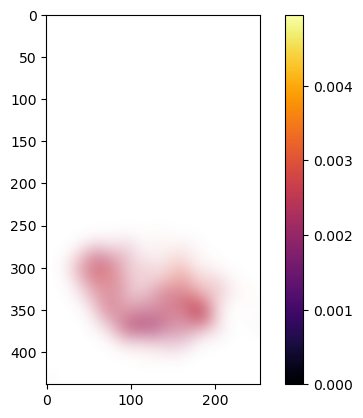

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

idx = 100
cm = plt.cm.inferno
RGBA = cm(local_avg/np.max(local_avg))
RGBA[...,-1] = density/np.max(density)
RGBA[0:225,:,:,:] = 0

sub_RGBA = RGBA[:,:,idx,:]
# sub_RGBA[int(np.shape(RGBA)[0]/2):np.shape(RGBA)[0],:,:] = np.zeros_like(sub_RGBA[int(np.shape(RGBA)[0]/2):np.shape(RGBA)[0],:,:])
h = ax.imshow(sub_RGBA,cmap=cm,vmin=np.min(local_avg),vmax=np.max(local_avg)) # extra arguments are for making a colorbar

plt.colorbar(h)

In [16]:
import os
import numpy as np

def ipynb_filter(str):
    if 'ipynb' in str:
        return False
    else:
        return True

prop_name = 'Bif torque local'
folder_name = f'S_bound_prop_{prop_name}_var_D1D2'
indir = f'/home/abenneck/nafs/dtward/andrew_work/test/dragonfly_work/3D_dist_gifs/{folder_name}/'
        
# Get idx of '-' char for sorting files
ex_fname = sorted(os.listdir(indir))[1]
idx_of_neg = np.char.index(ex_fname, '-').item()

# List of files in ascending order (-x => +x)
indir_files = sorted(filter(ipynb_filter, os.listdir(indir)), key = lambda str: int(str[idx_of_neg:-6]))
indir_files[240:495][-1]

'prop_Bif torque local_3350.0.png'

In [11]:
len(indir_files)

610

In [41]:
# Make a gif of the images from indir
import imageio.v2 as imageio

def save_brain_tiff(indir, out_fname):
    def ipynb_filter(str):
        if 'ipynb' in str:
            return False
        else:
            return True
            
    # Get idx of '-' char for sorting files
    ex_fname = sorted(os.listdir(indir))[1]
    idx_of_neg = np.char.index(ex_fname, '-').item()

    # List of files in ascending order (-x => +x)
    indir_files = sorted(filter(ipynb_filter, os.listdir(indir)), key = lambda str: int(str[idx_of_neg:-6]))
    frames = []    
    for fname in indir_files:
        frames.append(imageio.imread(os.path.join(indir,fname)))

    # Save all frames in a gif
    imageio.mimsave(out_fname, frames, duration = 0.001, loop = 0)

    print(f'gif saved at {out_fname}')

# Generate all frames for .gif output
prop_name = Sum PathDistance
folder_name = f'S_bound_prob_prop_{prop_name}_slices_AB'
indir = f'/home/{user}/nafs/dtward/andrew_work/test/dragonfly_work/3D_dist_gifs/{folder_name}/'
out_fname = f'/home/{user}/nafs/dtward/andrew_work/test/dragonfly_work/3D_dist_gifs/S_bound_prob_prop_{prop_name}_slices_AB.tif'

save_brain_tiff

/tmp/ipykernel_3212796/2284220947.py:3: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  np.where(self_and_children == 672)


(array([], dtype=int64),)

In [ ]:
import nibabel
import numpy as np
import sys
sys.path.append(f'/home/abenneck/Desktop/emlddmm')
import emlddmm

brain = 'TME08-1'
fpath = f'/home/abenneck/dragonfly_work/neuroglancer_prep/{brain}_reconstructed.vtk'
fpath_out = f'/home/abenneck/neuroglancer/data/{brain}_reconstructed.nii.gz'
# fpath_out = f'/home/abenneck/dragonfly_work/neuroglancer_prep/{brain}_reconstructed_f32.nii.gz'

xI,I_,title,names = emlddmm.read_data(fpath)
I_ = I_.astype(np.float32)

tform = np.load(f'/home/abenneck/dragonfly_work/dragonfly_outputs/{brain}/dragonfly_output_vis/transformation_outputs.npz')
A = tform['A']

# img = nibabel.load(fpath)
# img_cp = np.copy(img.get_fdata())
# hd = img.header

# img_cp = np.nan_to_num(img_cp)
# img_cp = img_cp.astype(np.float32)
# img.set_data_dtype(np.float32)


# # if nifty1
# if hd['sizeof_hdr'] == 348:
#     img_cp = nibabel.Nifti1Image(img_cp, img.affine, header=hd)
# # if nifty2
# elif hd['sizeof_hdr'] == 540:
#     img_cp = nibabel.Nifti2Image(img_cp, img.affine, header=hd)
# else:
#     raise IOError('Input image header problem')

I_ = nibabel.Nifti1Image(I_, affine = A)

nibabel.save(I_, fpath_out)

In [15]:
import nibabel
import numpy as np
import sys
sys.path.append(f'/home/abenneck/Desktop/emlddmm')
import emlddmm

brain = 'TME08-1'
fpath = f'/home/abenneck/dragonfly_work/neuroglancer_prep/{brain}_reconstructed.vtk'
fpath_out = f'/home/abenneck/neuroglancer/data/{brain}_reconstructed.nii.gz'
# fpath_out = f'/home/abenneck/dragonfly_work/neuroglancer_prep/{brain}_reconstructed_f32.nii.gz'

# tform = np.load(f'/home/abenneck/dragonfly_work/dragonfly_outputs/{brain}/dragonfly_output_vis/transformation_outputs.npz')
# A = tform['A']

# A == diagonal matrix with 50,50,50,1 along the diagonal
# The 1 means the matrix is homogeneous coordinates and the 50s are the pixel size
A = np.asarray([[50,0,0,0],[0,50,0,0],[0,0,50,0],[0,0,0,-1]])

xI,I_,title,names = emlddmm.read_data(fpath)
I_ = I_.astype(np.float32)

# img = nibabel.load(fpath)
# img_cp = np.copy(img.get_fdata())
# hd = img.header

# img_cp = np.nan_to_num(img_cp)
# img_cp = img_cp.astype(np.float32)
# img.set_data_dtype(np.float32)


# # if nifty1
# if hd['sizeof_hdr'] == 348:
#     img_cp = nibabel.Nifti1Image(img_cp, img.affine, header=hd)
# # if nifty2
# elif hd['sizeof_hdr'] == 540:
#     img_cp = nibabel.Nifti2Image(img_cp, img.affine, header=hd)
# else:
#     raise IOError('Input image header problem')

I_ = nibabel.Nifti1Image(I_, affine = A)

nibabel.save(I_, fpath_out)

In [13]:
tform = np.load('/home/abenneck/dragonfly_work/dragonfly_outputs/TME08-1/dragonfly_output_vis/transformation_outputs.npz')
print([t for t in tform])
print(tform['AJ'])

['xv', 'v', 'xvJ', 'vJ', 'A', 'AJ', 'TJ', 'dtype']
[[[-6.49972383e-01 -1.56989631e-04 -3.29443121e-04  2.10318752e+00]
  [ 1.95085967e-01  9.90201318e-01  1.20754359e-02 -1.96999040e+02]
  [ 2.37365294e-04  9.46527199e-06 -9.88871101e-01 -4.38866461e+02]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 [[-6.10207300e-01 -1.22075941e-03 -5.80571776e-04  1.07025659e+01]
  [ 4.75511781e-02  9.97206057e-01  7.05029482e-03  1.99156831e+02]
  [-3.38491392e-04  1.10763135e-03 -1.01133757e+00  3.68201036e+01]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 [[ 5.98605684e-01 -8.16388582e-04 -5.65176318e-05  5.62255202e+00]
  [ 6.19320446e-02  9.98734181e-01  2.95464240e-03  2.78174016e+02]
  [-1.43121884e-02 -7.12974016e-04  1.01746417e+00 -4.64481409e+02]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 [[-6.47428651e-01 -3.20092563e-04 -3.28518816e-04 -6.59342716e+00]
  [ 1.53868998e-01  9.84501489e-01  3.67023198e-02 -1.73379